In [1]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1 
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = GreenNN()
model.build(loadPath = "savedModels/laplace")

Using tensorflow 2.9.0
Metal device set to: Apple M1 Pro


In [29]:
%%time
cheb2prefs = Chebpy2Preferences()
cheb2prefs.prefx.eps = 1e-9
cheb2prefs.prefx.eps = 1e-9
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = cheb2prefs, simplify = False)

CPU times: user 1.77 s, sys: 936 ms, total: 2.71 s
Wall time: 3.14 s


In [30]:
g

chebfun2 object
     domain       rank               corner values
[0,1] x [0,1]     69       [-0.004 -0.000 -0.000 -0.003]
vertical scale = 0.247373

In [31]:
%%time
u,s,v = g.svd()

CPU times: user 4.01 s, sys: 2.93 s, total: 6.94 s
Wall time: 2.14 s


1.1168890819952046


(0.0, 1.0)

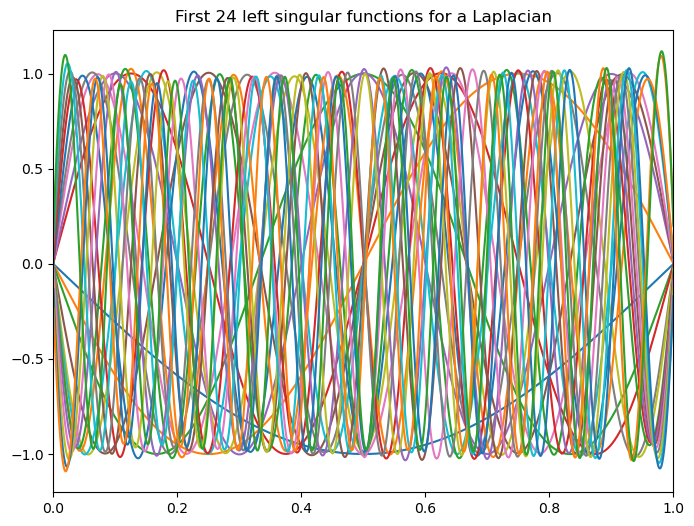

In [34]:
i = np.floor(2*len(g.pivotValues)/np.pi).astype(int)-20
fig = plt.figure(figsize = (8,6))
u[:,:i].plot()
print(np.max(u[:,:i].vscale))
plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [35]:
u[0,:i]

array([-0.00162439, -0.00161566, -0.00689765,  0.00907879,  0.00507032,
       -0.0122124 ,  0.00329736,  0.02305564, -0.00485747, -0.0235115 ,
       -0.00783598, -0.01384139,  0.01780497,  0.01882678,  0.00444671,
        0.05115521, -0.03232875,  0.10505781, -0.08241434,  0.1698729 ,
       -0.13411134, -0.23377056,  0.17396809])

In [22]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

CPU times: user 1.5 s, sys: 421 ms, total: 1.92 s
Wall time: 2.35 s


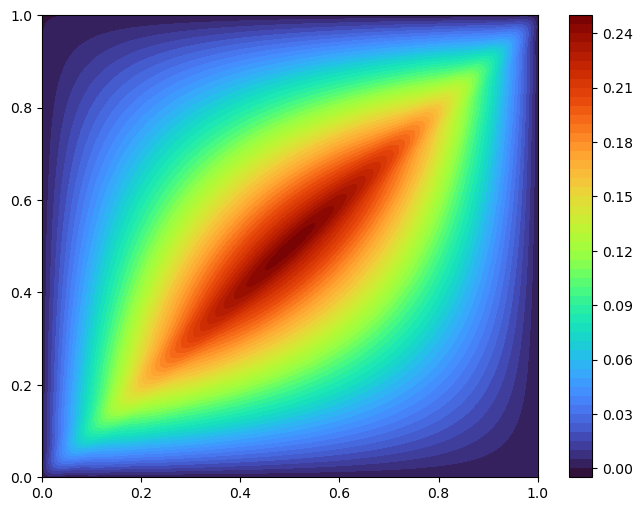

In [23]:
%%time
Gneural = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning.png', dpi = fig.dpi)

CPU times: user 2.3 s, sys: 2.77 s, total: 5.07 s
Wall time: 1.59 s


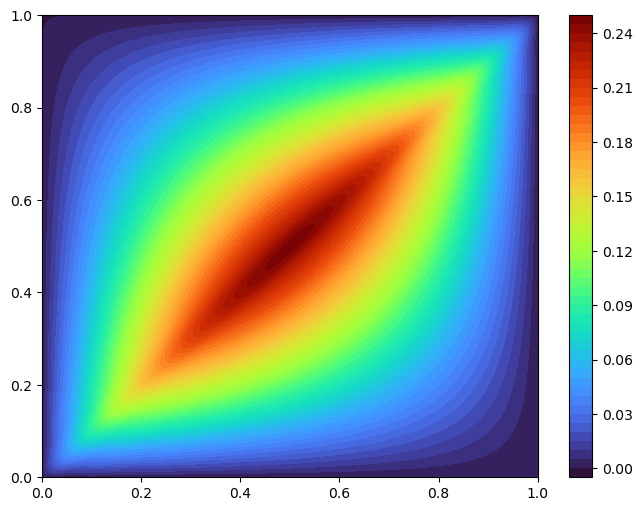

In [24]:
%%time
G = g[x,y]
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning_chebfun2.png', dpi = fig.dpi)